In [ ]:
from matplotlib import pyplot as plt

import torch
model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', pretrained=True)
# or any of these variants
# model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet34', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet50', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet101', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet152', pretrained=True)
model.eval()

Downloading: "https://github.com/pytorch/vision/archive/v0.10.0.zip" to /root/.cache/torch/hub/v0.10.0.zip
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


All pre-trained models expect input images normalized in the same way,
i.e. mini-batches of 3-channel RGB images of shape `(3 x H x W)`, where `H` and `W` are expected to be at least `224`.
The images have to be loaded in to a range of `[0, 1]` and then normalized using `mean = [0.485, 0.456, 0.406]`
and `std = [0.229, 0.224, 0.225]`.

Here's a sample execution.

In [8]:
ls /content/drive/MyDrive/Output/5* | wc -l


Streaming output truncated to the last 5000 lines.
ls: cannot access '/content/drive/MyDrive/Output/5_2_13_33157_.jpg': No such file or directory
ls: cannot access '/content/drive/MyDrive/Output/5_2_13_33164_.jpg': No such file or directory
ls: cannot access '/content/drive/MyDrive/Output/5_2_13_33171_.jpg': No such file or directory
ls: cannot access '/content/drive/MyDrive/Output/5_2_13_33178_.jpg': No such file or directory
ls: cannot access '/content/drive/MyDrive/Output/5_2_13_33185_.jpg': No such file or directory
ls: cannot access '/content/drive/MyDrive/Output/5_2_13_33192_.jpg': No such file or directory
ls: cannot access '/content/drive/MyDrive/Output/5_2_13_33199_.jpg': No such file or directory
ls: cannot access '/content/drive/MyDrive/Output/5_2_13_33206_.jpg': No such file or directory
ls: cannot access '/content/drive/MyDrive/Output/5_2_13_33213_.jpg': No such file or directory
ls: cannot access '/content/drive/MyDrive/Output/5_2_1_33321_.jpg': No such file or directory


In [ ]:
# # Download an example image from the pytorch website
# import urllib
# url, filename = ("https://github.com/pytorch/hub/raw/master/images/dog.jpg", "dog.jpg")
# try: urllib.URLopener().retrieve(url, filename)
# except: urllib.request.urlretrieve(url, filename)

In [ ]:
!wget https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt

--2022-03-17 15:25:53--  https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10472 (10K) [text/plain]
Saving to: ‘imagenet_classes.txt’

imagenet_classes.tx 100%[===================>]  10.23K  --.-KB/s    in 0s      

2022-03-17 15:25:53 (46.5 MB/s) - ‘imagenet_classes.txt’ saved [10472/10472]



In [ ]:
# sample execution (requires torchvision)
from PIL import Image
from torchvision import transforms
import os 

# Read the categories
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]

indir = 'drive/MyDrive/Output/'

preprocess = transforms.Compose([
    transforms.Resize(256),
    # transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


files = os.listdir(indir)    

objects = ['Banana', 'CustardApple', 'Fig', 'GrannySmith', 'Jackfruit', 'Lemon', 'Pineapple', 'Pomegranate', 'Strawberry', 'Orange']
object_map = {0:954, 1:956, 2:952, 3:948, 4:955, 5:951, 6:953, 7:957, 8:949, 9:950}
objects_freq = {str(o1)+'_'+str(o2):{} for o1 in range(10) for o2 in range(10) if o1 != o2}
objects_freq_top1 = {str(o1)+'_'+str(o2):{} for o1 in range(10) for o2 in range(10) if o1 != o2}



model.to('cuda')

for idx, f in enumerate(files):
  print(idx)

  obj1, obj2, cut = f.split('_')[:3]
  # obj1, obj2, cut = objects[int(obj1)], objects[int(obj2)], int(cut)
  cut = int(cut)  

  filename = os.path.join(indir, f)
  input_image = Image.open(filename)
  input_tensor = preprocess(input_image)
  input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

  # move the input and model to GPU for speed if available
  # if torch.cuda.is_available():
  input_batch = input_batch.to('cuda')
      

  with torch.no_grad():
      output = model(input_batch)
  # Tensor of shape 1000, with confidence scores over Imagenet's 1000 classes
  # print(output[0])
  # The output has unnormalized scores. To get probabilities, you can run a softmax on it.
  probabilities = torch.nn.functional.softmax(output[0], dim=0)
  # print(probabilities)


  # Show top categories per image
  top5_prob, top5_catid = torch.topk(probabilities, 5)
  top1_prob, top1_catid = torch.topk(probabilities, 1)  

  # for i in range(top5_prob.size(0)):
      # print(categories[top5_catid[i]], top5_prob[i].item())

  freq1, freq2 = objects_freq[obj1+'_'+obj2].get(cut, (0,0))
  freq1 = freq1+1 if object_map[int(obj1)] in top5_catid else freq1
  freq2 = freq2+1 if object_map[int(obj2)] in top5_catid else freq2

  objects_freq[obj1+'_'+obj2][cut] = (freq1, freq2)


  freq1, freq2 = objects_freq_top1[obj1+'_'+obj2].get(cut, (0,0))
  freq1 = freq1+1 if object_map[int(obj1)] == top1_catid else freq1
  freq2 = freq2+1 if object_map[int(obj2)] == top1_catid else freq2

  objects_freq_top1[obj1+'_'+obj2][cut] = (freq1, freq2)



OSError: ignored

In [ ]:
objects_freq

{'0_1': {'1': (22, 6),
  '10': (4, 84),
  '13': (5, 84),
  '16': (3, 85),
  '19': (3, 87),
  '4': (2, 56),
  '7': (3, 80)},
 '0_2': {},
 '0_3': {},
 '0_4': {},
 '0_5': {},
 '0_6': {},
 '0_7': {},
 '0_8': {},
 '0_9': {},
 '1_0': {'1': (92, 0),
  '10': (18, 49),
  '13': (15, 59),
  '16': (15, 64),
  '19': (14, 67),
  '4': (27, 12),
  '7': (18, 31)},
 '1_2': {},
 '1_3': {},
 '1_4': {},
 '1_5': {},
 '1_6': {},
 '1_7': {},
 '1_8': {},
 '1_9': {},
 '2_0': {},
 '2_1': {},
 '2_3': {},
 '2_4': {},
 '2_5': {},
 '2_6': {},
 '2_7': {},
 '2_8': {},
 '2_9': {},
 '3_0': {},
 '3_1': {},
 '3_2': {},
 '3_4': {},
 '3_5': {},
 '3_6': {},
 '3_7': {},
 '3_8': {},
 '3_9': {},
 '4_0': {},
 '4_1': {},
 '4_2': {},
 '4_3': {},
 '4_5': {},
 '4_6': {},
 '4_7': {},
 '4_8': {},
 '4_9': {},
 '5_0': {},
 '5_1': {},
 '5_2': {},
 '5_3': {},
 '5_4': {},
 '5_6': {},
 '5_7': {},
 '5_8': {},
 '5_9': {},
 '6_0': {},
 '6_1': {},
 '6_2': {},
 '6_3': {},
 '6_4': {},
 '6_5': {},
 '6_7': {},
 '6_8': {},
 '6_9': {},
 '7_0': {},
 '

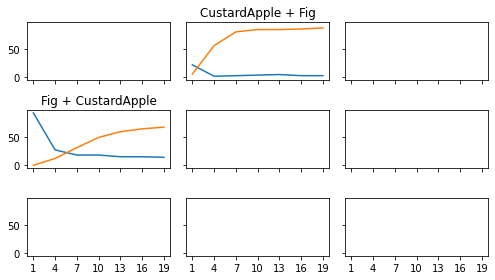

In [ ]:
fig, axs = plt.subplots(3, 3, figsize=(7, 4), sharey=True, sharex=True)
plt.setp(axs, xticks=range(7), xticklabels=['1','4','7','10','13','16','19'])

for row in objects_freq:
  if len(objects_freq[row]) > 0:
    n1, n2 = row.split('_')
    n1, n2 = int(n1), int(n2)
    ob1, ob2 = [], []
    for key in [1,4,7,10,13,16,19]:
      o1, o2 = objects_freq[row][str(key)]
      ob1.append(o1)
      ob2.append(o2)

    
    axs[n1][n2].plot(ob1)
    axs[n1][n2].plot(ob2)
    # axs[n1][n2].ticks([]) #range(7), ['1','4','7','10','13','16','19'])
    axs[n1][n2].set_title(objects[n1+1] + ' + '  + objects[n2+1])
    # axs[n1][n2].set_ylabel(objects[n1+1] + ' + '  + objects[n2+1])
    # plt.show()
fig.tight_layout()
plt.show()

In [ ]:
axs[1][1]

Samoyed 0.45230814814567566
white wolf 0.09957956522703171
Pomeranian 0.09253544360399246
keeshond 0.07441794872283936
Arctic fox 0.07019094377756119


In [ ]:
10 * 100 * 

### Model Description

Resnet models were proposed in "Deep Residual Learning for Image Recognition".
Here we have the 5 versions of resnet models, which contains 18, 34, 50, 101, 152 layers respectively.
Detailed model architectures can be found in Table 1.
Their 1-crop error rates on imagenet dataset with pretrained models are listed below.

| Model structure | Top-1 error | Top-5 error |
| --------------- | ----------- | ----------- |
|  resnet18       | 30.24       | 10.92       |
|  resnet34       | 26.70       | 8.58        |
|  resnet50       | 23.85       | 7.13        |
|  resnet101      | 22.63       | 6.44        |
|  resnet152      | 21.69       | 5.94        |

### References

 - [Deep Residual Learning for Image Recognition](https://arxiv.org/abs/1512.03385)